In [1]:
import sys
import importlib
from os.path import join as opj
from os.path import isdir
from os import mkdir
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# from nilearn import image
# from nilearn.masking import apply_mask
# from nilearn.input_data import NiftiMasker, NiftiSpheresMasker
# from nilearn import plotting

# import gm_analysis
import gm_analysis as gma

sns.set_style('white')
sns.set_context('notebook')
palette = sns.color_palette('Set1')

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


/home/marius/.virtualenvs/fmri/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/home/marius/.virtualenvs/fmri/lib/python3.8/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
# init new dict if not existing
if 'subjects' not in locals():
        subjects = {}

sub_ses_list = {
    'sub-00': {
        'sessions': ['ses-gc', 'ses-com'], 
        'subject_type': 'pilot'
    },
    'sub-0000':{
        'sessions': ['ses-com', 'ses-sep'], 
        'subject_type': 'pilot'
    }
}

for sub_id in sub_ses_list:
    subjects[sub_id] = {}
    
    for ses_ in sub_ses_list[sub_id]['sessions']:
            subjects[sub_id][ses_] = gma.subject.Subject(sub_id, sub_ses_list[sub_id]['subject_type'], ses_, gma.info.data_paths)
    

None
No results found for: sub-00
None
No results found for: sub-00
None
No results found for: sub-0000
None
No results found for: sub-0000


# extract/ load time courses from ROI

In [9]:


###################
############ SET ########
###############################

load_data = ''#'/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/from_nideconv/sub-0000/roi_signals_dict_task-co-go_functional-other-ROIs_cleaned-fwhm-5_cue-aligned.pkl'

sub_ses_task_dict = {

    'sub-00': {
        'subject_type': 'pilot',
        'ROIs':['GFP', 'fMotionArea', 'Marquardt2017GFP'],
        'sessions':{
            'ses-gc': {
                'gc':['Gaze_1', 'Gaze_2', 'Gaze_3', 'Cubes_1', 'Cubes_2', 'Cubes_3']
            },
            'ses-com': {
                'gic': ['Gaze_1', 'Iris_1', 'Iris_2', 'Iris_3', 'Cubes_1', 'Cubes_2', 'Cubes_3'],
                'co': ['Cubes_1', 'Cubes_2', 'Cubes_3'],
            }
        }
    },
    'sub-0000': {
        'subject_type': 'pilot',
        'ROIs':['GFP', 'GFPalt', 'Marquardt2017GFP', 'fMotionArea', 'GazeCubes'],
        'sessions':{
            'ses-com' : {
                'gic': ['Gaze_1', 'Gaze_2', 'Gaze_3', 'Iris_1', 'Iris_2', 'Iris_3', 'Cubes_1', 'Cubes_2', 'Cubes_3']
            },
            'ses-sep': {
                'co': ['Cubes_1', 'Cubes_2', 'Cubes_3'],
                'go': ['Gaze_1', 'Gaze_2', 'Gaze_3']
            }
        }
    }
}
f_name_dict = {
    'sub-00': {
        'ses-gc': 'task-gc_targets-individual_functional-other-ROIs_cleaned-fwhm-5_cue-aligned',  
        'ses-com': 'task-co_targets-individual_functional-other-ROIs_cleaned-fwhm-5_cue-aligned'   
    },
    'sub-0000': {
        'ses-com': 'task-gic_targets-individual_functional-other-ROIs_cleaned-fwhm-5_cue-aligned',   
        'ses-sep': 'task-co-go_targets-individual_functional-other-ROIs_cleaned-fwhm-5_cue-aligned'
    }
}




if load_data:
    f_name_extension = load_data.split('dict_')[1].split('.')[0]


for sub_id in sub_ses_task_dict:

    for session in sub_ses_task_dict[sub_id]['sessions']:
    
        tasks_cond_dict = sub_ses_task_dict[sub_id]['sessions'][session]
    
        subjects[sub_id][session].extract_roi_signals(
            tasks_cond_dict=tasks_cond_dict, 
            subject_type=sub_ses_task_dict[sub_id]['subject_type'],
            which_images='img', # 'img', 'img_cleaned_standardized', 'img_cleaned', 'img_cleaned_smoothed', 
            smoothing_fwhm=8,
            confound_load_strategy='fmriprep_interface', # 'manual', 'fmriprep_interface', None
            clean_image='use_NiftiMasker', # use_NiftiMasker or use_clean_img
            confound_parms={
                'strategy':['motion', 'wm_csf', 'global_signal'], # 'compcor', 'high_pass', 'wm_csf',
                'motion':'derivatives',
                'wm_csf':'derivatives',
                'global_signal':'derivatives',
                'scrub':0,
                'fd_threshold':.2,
                'std_dvars_threshold':3,
                'compcor':'anat_combined',
                'n_compcor':20,
                'demean':False
            }, # revommended to be True when using with NiftiMasker, False when using with signal.clean
            standardize='zscore', # 'psc', 'zscore', False
            load_data=load_data, 
            f_name_extension=f_name_dict[sub_id][session], 
            roi_selection=sub_ses_task_dict[sub_id]['ROIs'] # ['functional', 'anatomical', 'neurosynth', 'other', 'TPJ']
            )

*** GFP ROI added to analysis
*** fMotionArea ROI added to analysis
*** Marquardt2017GFP ROI added to analysis
Extrcting signal from:  GFP left
Extrcting signal from:  fMotionArea left
Extrcting signal from:  Marquardt2017GFP left


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.



*** CONFOUNDS ***

/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-00/ses-gc/func/sub-00_ses-gc_task-gc_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Index(['csf', 'csf_derivative1', 'global_signal', 'global_signal_derivative1',
       'rot_x', 'rot_x_derivative1', 'rot_y', 'rot_y_derivative1', 'rot_z',
       'rot_z_derivative1', 'trans_x', 'trans_x_derivative1', 'trans_y',
       'trans_y_derivative1', 'trans_z', 'trans_z_derivative1', 'white_matter',
       'white_matter_derivative1'],
      dtype='object')

*** SAMPLE MASK ***

None

*** CONFOUNDS ***

/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-00/ses-gc/func/sub-00_ses-gc_task-gc_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Index(['csf', 'csf_derivative1', 'global_signal', 'global_signal_derivative1',
       'rot_x', 'rot_x_derivative1', 'rot_y', 'rot_y_derivative1', 'rot_z',
       'rot_z_derivative1', 'trans_x', 'trans_x_derivative1', 'trans_y',
       'trans_y_derivative1', 'tr

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.6min finished


*** GFP ROI added to analysis
*** fMotionArea ROI added to analysis
*** Marquardt2017GFP ROI added to analysis
Extrcting signal from:  GFP left
Extrcting signal from:  fMotionArea left
Extrcting signal from:  Marquardt2017GFP left


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.



*** CONFOUNDS ***

/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-00/ses-com/func/sub-00_ses-com_task-gic_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Index(['csf', 'csf_derivative1', 'global_signal', 'global_signal_derivative1',
       'rot_x', 'rot_x_derivative1', 'rot_y', 'rot_y_derivative1', 'rot_z',
       'rot_z_derivative1', 'trans_x', 'trans_x_derivative1', 'trans_y',
       'trans_y_derivative1', 'trans_z', 'trans_z_derivative1', 'white_matter',
       'white_matter_derivative1'],
      dtype='object')

*** SAMPLE MASK ***

None

*** CONFOUNDS ***

/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-00/ses-com/func/sub-00_ses-com_task-gic_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Index(['csf', 'csf_derivative1', 'global_signal', 'global_signal_derivative1',
       'rot_x', 'rot_x_derivative1', 'rot_y', 'rot_y_derivative1', 'rot_z',
       'rot_z_derivative1', 'trans_x', 'trans_x_derivative1', 'trans_y',
       'trans_y_derivative1

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished


*** GFP ROI added to analysis
*** GazeCubes ROI added to analysis
*** fMotionArea ROI added to analysis
*** GFPalt ROI added to analysis
*** Marquardt2017GFP ROI added to analysis
Extrcting signal from:  GFP left
Extrcting signal from:  GazeCubes left
Extrcting signal from:  fMotionArea left
Extrcting signal from:  GFPalt left


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.



*** CONFOUNDS ***

/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-0000/ses-com/func/sub-0000_ses-com_task-gic_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Index(['csf', 'csf_derivative1', 'global_signal', 'global_signal_derivative1',
       'rot_x', 'rot_x_derivative1', 'rot_y', 'rot_y_derivative1', 'rot_z',
       'rot_z_derivative1', 'trans_x', 'trans_x_derivative1', 'trans_y',
       'trans_y_derivative1', 'trans_z', 'trans_z_derivative1', 'white_matter',
       'white_matter_derivative1'],
      dtype='object')

*** SAMPLE MASK ***

None

*** CONFOUNDS ***

/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-0000/ses-com/func/sub-0000_ses-com_task-gic_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Index(['csf', 'csf_derivative1', 'global_signal', 'global_signal_derivative1',
       'rot_x', 'rot_x_derivative1', 'rot_y', 'rot_y_derivative1', 'rot_z',
       'rot_z_derivative1', 'trans_x', 'trans_x_derivative1', 'trans_y',
       'trans_y_der

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


*** GFP ROI added to analysis
*** GazeCubes ROI added to analysis
*** fMotionArea ROI added to analysis
*** GFPalt ROI added to analysis
*** Marquardt2017GFP ROI added to analysis
Extrcting signal from:  GFP left
Extrcting signal from:  GazeCubes left
Extrcting signal from:  fMotionArea left
Extrcting signal from:  GFPalt left


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.



*** CONFOUNDS ***

/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-0000/ses-sep/func/sub-0000_ses-sep_task-co_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Index(['csf', 'csf_derivative1', 'global_signal', 'global_signal_derivative1',
       'rot_x', 'rot_x_derivative1', 'rot_y', 'rot_y_derivative1', 'rot_z',
       'rot_z_derivative1', 'trans_x', 'trans_x_derivative1', 'trans_y',
       'trans_y_derivative1', 'trans_z', 'trans_z_derivative1', 'white_matter',
       'white_matter_derivative1'],
      dtype='object')

*** SAMPLE MASK ***

None

*** CONFOUNDS ***

/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-0000/ses-sep/func/sub-0000_ses-sep_task-co_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Index(['csf', 'csf_derivative1', 'global_signal', 'global_signal_derivative1',
       'rot_x', 'rot_x_derivative1', 'rot_y', 'rot_y_derivative1', 'rot_z',
       'rot_z_derivative1', 'trans_x', 'trans_x_derivative1', 'trans_y',
       'trans_y_deriv

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished


In [21]:
subjects['sub-0000']['ses-com'].info.func['gic'].keys()

dict_keys(['gic_run-1', 'gic_run-2', 'gic_run-3', 'gic_run-4', 'gic_run-5', 'gic_run-6'])

In [ ]:
subjects['sub-0000']['ses-sep'].hrf_estimation.roi_signals

In [7]:
from nilearn import image

In [8]:
img_ = image.load_img('/media/marius/data_ex/gaze-motion/derivatives/fmriprep/sub-0000/ses-sep/func/sub-0000_ses-sep_task-co_run-1_space-MNI152NLin2009cAsym_desc-preprocCleaned_s5_standardized_bold.nii.gz')

In [10]:
np.shape(img_)

(65, 77, 65, 272)

# Fit models 

In [10]:
###################
############ SET ########
###############################

sub_ses_task_dict = {

    'sub-00': {
        'ses-gc': {
            'gc': ['Gaze_1', 'Gaze_2', 'Gaze_3', 'Cubes_1', 'Cubes_2', 'Cubes_3'],
        },
        'ses-com': {
            'co': ['Cubes_1', 'Cubes_2', 'Cubes_3'],
            'gic': ['Gaze_1', 'Iris_1', 'Iris_2', 'Iris_3', 'Cubes_1', 'Cubes_2', 'Cubes_3']
        }
    },
    
    'sub-0000': {
        'ses-com': {
            'gic': ['Gaze_1', 'Gaze_2', 'Gaze_3', 'Iris_1', 'Iris_2', 'Iris_3', 'Cubes_1', 'Cubes_2', 'Cubes_3'],
        },
        'ses-sep': {
            'co': ['Cubes_1', 'Cubes_2', 'Cubes_3'],
            'go': ['Gaze_1', 'Gaze_2', 'Gaze_3']
        }
    }
}

for sub_id in sub_ses_task_dict:

    for session in sub_ses_task_dict[sub_id]:
    
        for task_id_ in sub_ses_task_dict[sub_id][session]:

            look_at_cons = sub_ses_task_dict[sub_id][session][task_id_]
            
            print('')
            print(task_id_)

            for roi_type_ in ['functional', 'other']:#subjects[sub_id][session].info.ROIs.keys():
                
                print(roi_type_)

                for roi_name_ in list(subjects[sub_id][session].info.ROIs[roi_type_].keys()):

                    print(roi_name_)
                    
                    if roi_name_ in [el.split(' ')[0] for el in subjects[sub_id][session].hrf_estimation.roi_signals[task_id_]['data'].keys()]:

                        # hemi_rois_ = [el for el in subjects[sub_id][session].hrf_estimation.roi_signals[task_id_]['data'].columns if roi_name_ in el]
                        hemi_rois_ = [el for el in subjects[sub_id][session].hrf_estimation.roi_signals[task_id_]['data'].columns if roi_name_ == el.split(' ')[0]]
                        print('*** Fitting:', hemi_rois_)

                        subjects[sub_id][session].estimate_hrf(
                            task_id=task_id_,
                            roi_name=roi_name_,
                            hemi_rois=hemi_rois_,
                            look_at=look_at_cons,
                            basis_set='fourier',
                            n_regressors=9,
                            interval=[0, 13.5],
                            fit_type='ols')




gc
functional
GFP
*** Fitting: ['GFP left', 'GFP right']
fMotionArea
*** Fitting: ['fMotionArea left', 'fMotionArea right']
other
Marquardt2017GFP
*** Fitting: ['Marquardt2017GFP left', 'Marquardt2017GFP right']

co
functional
GFP
*** Fitting: ['GFP left', 'GFP right']
fMotionArea
*** Fitting: ['fMotionArea left', 'fMotionArea right']
other
Marquardt2017GFP
*** Fitting: ['Marquardt2017GFP left', 'Marquardt2017GFP right']

gic
functional
GFP
*** Fitting: ['GFP left', 'GFP right']
fMotionArea
*** Fitting: ['fMotionArea left', 'fMotionArea right']
other
Marquardt2017GFP
*** Fitting: ['Marquardt2017GFP left', 'Marquardt2017GFP right']

gic
functional
GFP
*** Fitting: ['GFP left', 'GFP right']
GazeCubes
*** Fitting: ['GazeCubes left', 'GazeCubes right']
fMotionArea
*** Fitting: ['fMotionArea left', 'fMotionArea right']
GFPalt
*** Fitting: ['GFPalt left', 'GFPalt right']
other
Marquardt2017GFP
*** Fitting: ['Marquardt2017GFP left', 'Marquardt2017GFP right']

co
functional
GFP
*** Fitting: [

# Make and store dataframe with time courses

In [12]:

df_collection = {}

tc_df = pd.DataFrame()


for sub_id in subjects:
    df_collection[sub_id] = {}

    for session in subjects[sub_id]:
        df_collection[sub_id][session] = {}
    
        for task_ in subjects[sub_id][session].hrf_estimation.model:
            df_collection[sub_id][session][task_] = pd.DataFrame()
    
            for ia_, area_ in enumerate(subjects[sub_id][session].hrf_estimation.model[task_].keys()):

                # init dataframe with time courses from first areas
                if ia_ == 0:
                    df_ = subjects[sub_id][session].hrf_estimation.model[task_][area_].get_conditionwise_timecourses().reset_index()
                    df_.insert(loc=0, column='participant', value=[sub_id]*len(df_))
                    df_.insert(loc=1, column='session', value=[session]*len(df_))
                    df_.insert(loc=2, column='task', value=[task_]*len(df_))

                else: # add other areas
                    df_ = df_.join(
                        subjects[sub_id][session].hrf_estimation.model[task_][area_].get_conditionwise_timecourses().reset_index().drop(['event type', 'covariate', 'time'], axis=1))

            tc_df = tc_df.append(df_)
            
### RENAME COLUMNS
tc_df.columns = tc_df.columns.str.replace(r"[ ._]", "-")
tc_df = tc_df.replace('_','-', regex=True)

# STORE
fp = '/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/data/pilot/hrf_estimates/tc_df_fwhm8.csv'
tc_df.to_csv(fp, sep='\t', index=False)

In [10]:
tc_df

,participant,session,task,event-type,covariate,time,GFP-left,GFP-right,fMotionArea-left,fMotionArea-right,GazeCubes-left,GazeCubes-right,Marquardt2017GFP-left,Marquardt2017GFP-right
0,sub-00,ses-gc,gc,Cubes-1,intercept,0.000,0.031324,-0.160297,-0.078542,-0.129623,NaN,NaN,NaN,NaN
1,sub-00,ses-gc,gc,Cubes-1,intercept,0.075,0.028554,-0.154912,-0.073495,-0.128353,NaN,NaN,NaN,NaN
2,sub-00,ses-gc,gc,Cubes-1,intercept,0.150,0.025428,-0.148912,-0.067371,-0.126090,NaN,NaN,NaN,NaN
3,sub-00,ses-gc,gc,Cubes-1,intercept,0.225,0.022169,-0.142141,-0.060021,-0.122629,NaN,NaN,NaN,NaN
4,sub-00,ses-gc,gc,Cubes-1,intercept,0.300,0.019010,-0.134441,-0.051302,-0.117773,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,sub-0000,ses-sep,go,Gaze-3,intercept,13.125,NaN,NaN,-0.123982,0.030138,0.035589,0.065877,-0.097673,-0.054498
536,sub-0000,ses-sep,go,Gaze-3,intercept,13.200,NaN,NaN,-0.124098,0.028898,0.020175,0.065871,-0.100275,-0.052186
537,sub-0000,ses-sep,go,Gaze-3,intercept,13.275,NaN,NaN,-0.124631,0.027153,0.004404,0.064344,-0.103365,-0.050890
538,sub-0000,ses-sep,go,Gaze-3,intercept,13.350,NaN,NaN,-0.125521,0.024934,-0.011493,0.061284,-0.106873,-0.050657


# Plot times courses

'GFP'

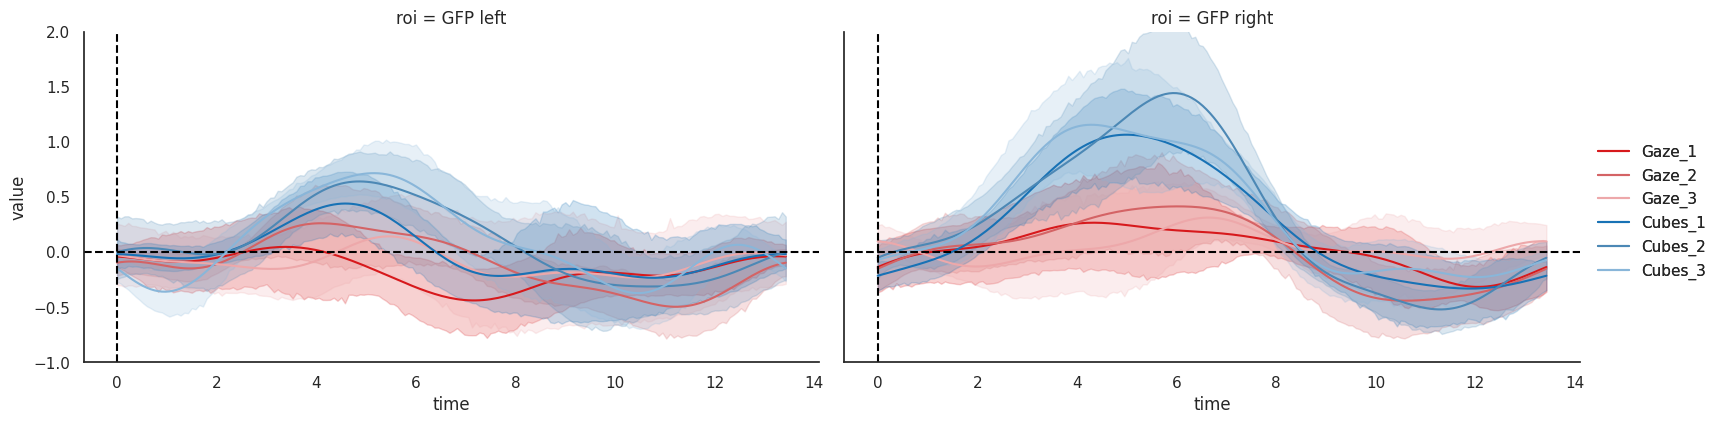

'GFPalt'

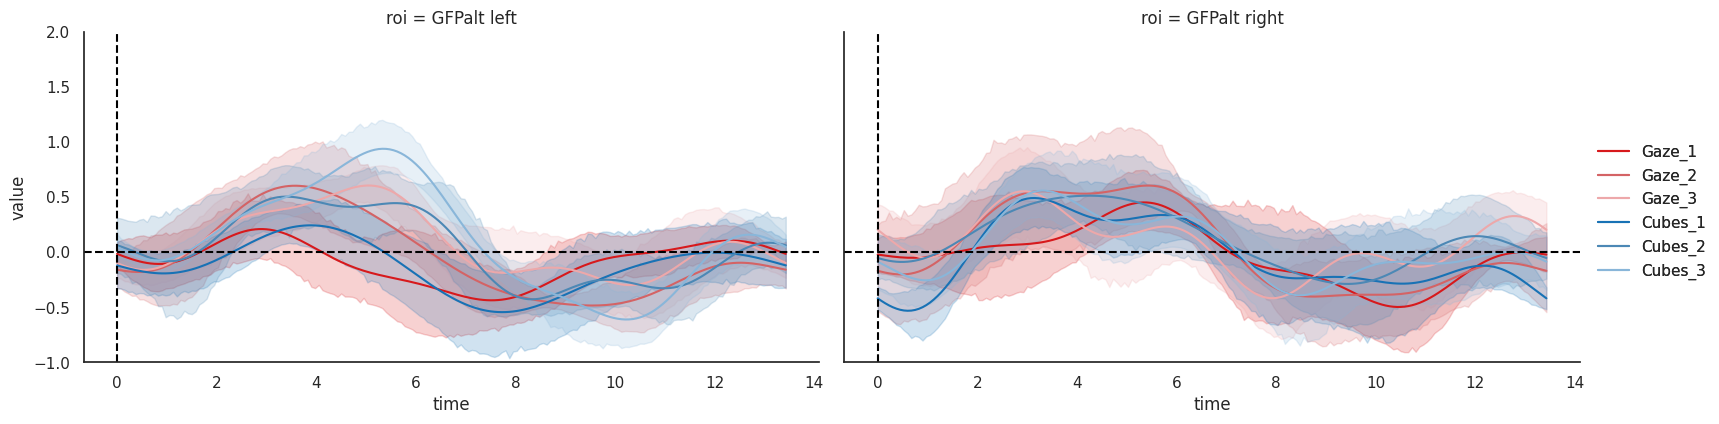

'Marquardt2017GFP'

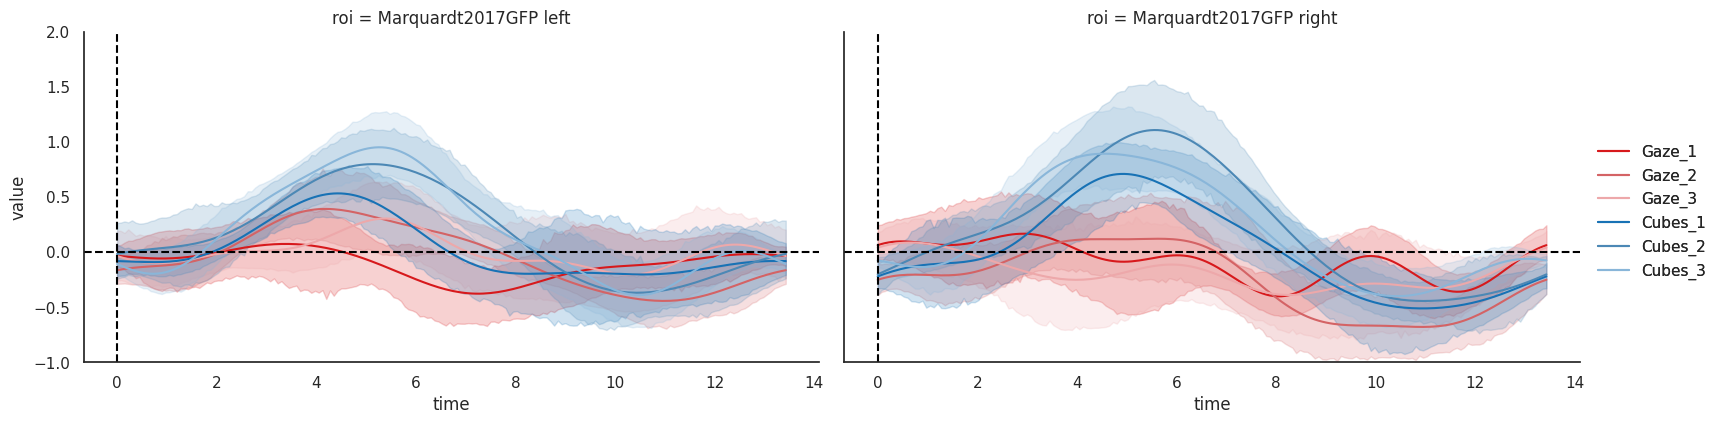

'fMotionArea'

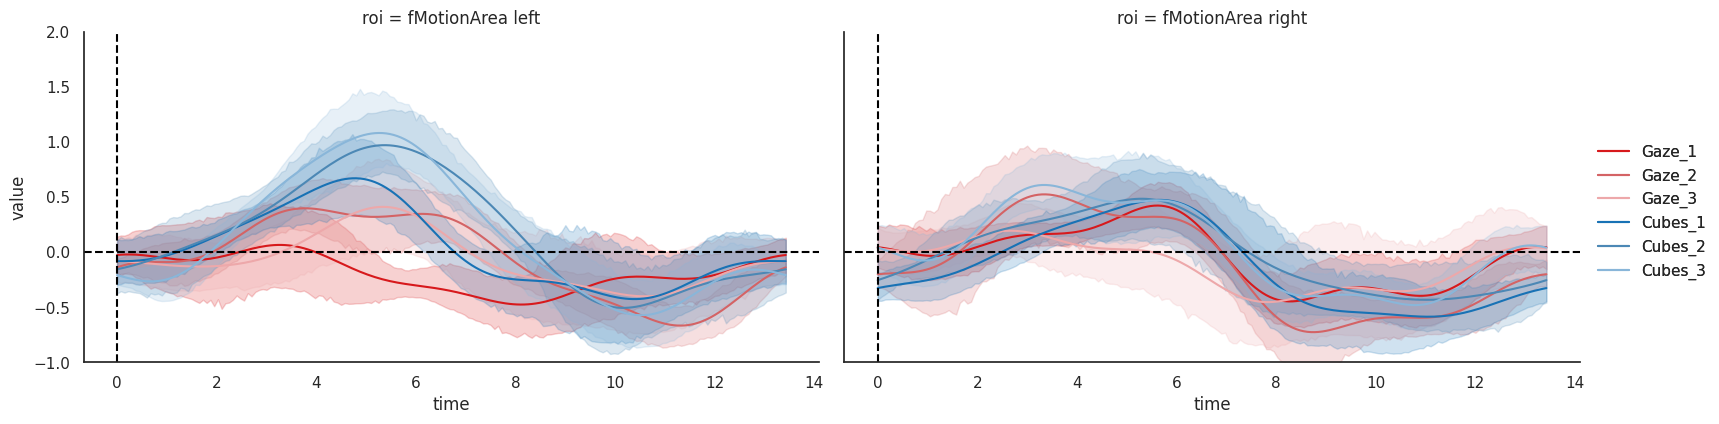

In [11]:
sub_id = 'sub-0000'
ses_id = 'ses-com'
task_id = 'gic'
look_at = ['Gaze_1', 'Gaze_2', 'Gaze_3', 'Cubes_1', 'Cubes_2', 'Cubes_3']

for area_ in ['GFP', 'GFPalt', 'Marquardt2017GFP', 'fMotionArea']:#subjects[sub_id][ses_id].hrf_estimation.model[task_id].keys():
    
    col_wrap = len(subjects[sub_id][ses_id].hrf_estimation.model[task_id][area_].get_timecourses().keys())
    
    if col_wrap > 0:
        plt.close('all')
        display(area_)
        fig = subjects[sub_id][ses_id].hrf_estimation.model[task_id][area_].plot_subject_timecourses(
            ci=95, 
            plots='subject', 
            col='roi', 
            col_wrap=col_wrap, 
            event_types=look_at, 
            palette=gma.info.colors, 
            height=5, 
            sharey=True)
        if col_wrap == 1:
            plt.title(area_)
        plt.ylim([-1, 2])
        plt.show()
        
        ### STORE IMAGE
#         f_name_extension = ses_id + '_' + task_id + '_' + 'individual-targets'

#         results_dir_ = opj(gma.info.data_paths.results_dir, 'from_nideconv', sub_id, f_name_extension)
#         if not isdir(results_dir_):
#             mkdir(results_dir_)
            
#         fig[0].fig.savefig(opj(results_dir_, area_+'.pdf'))


'GFP'

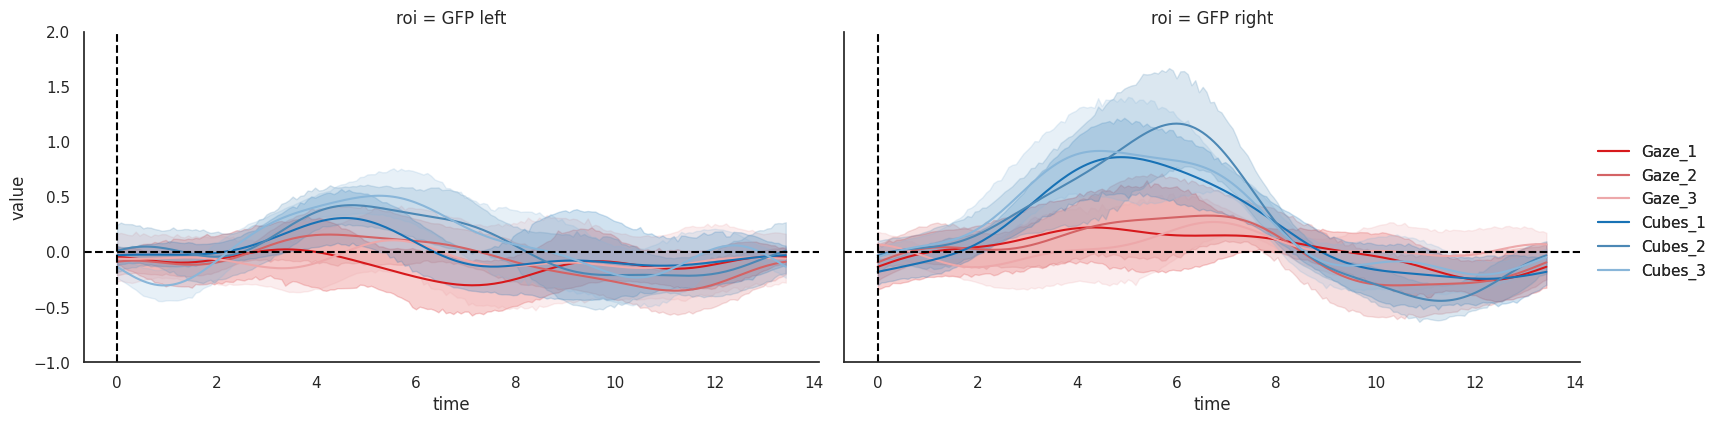

'GFPalt'

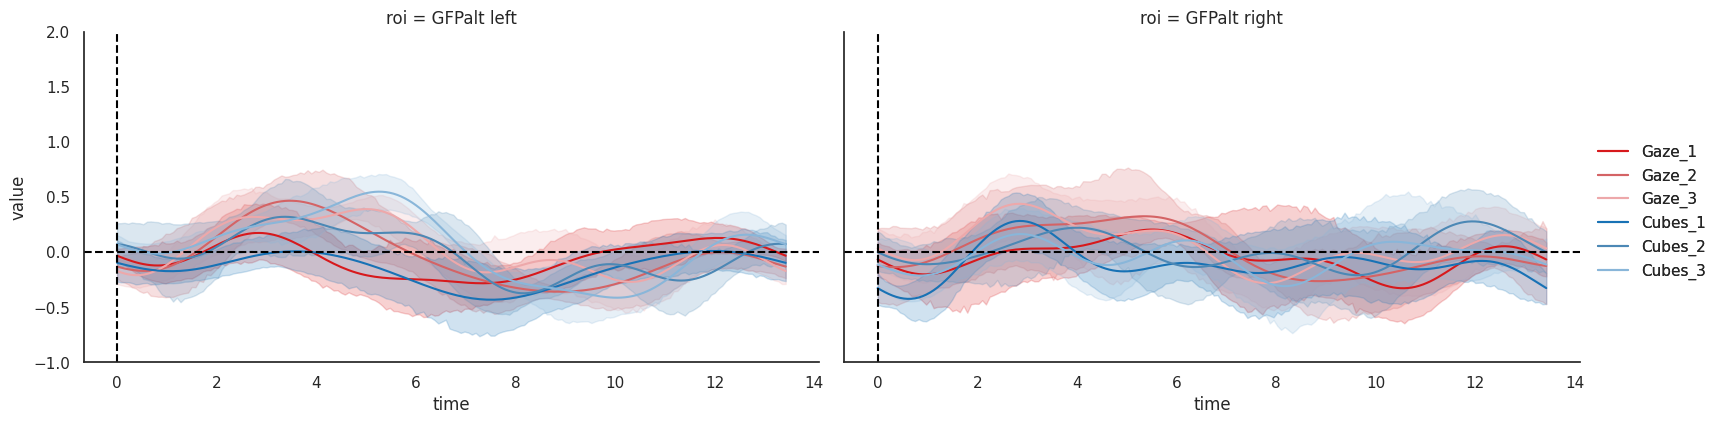

'Marquardt2017GFP'

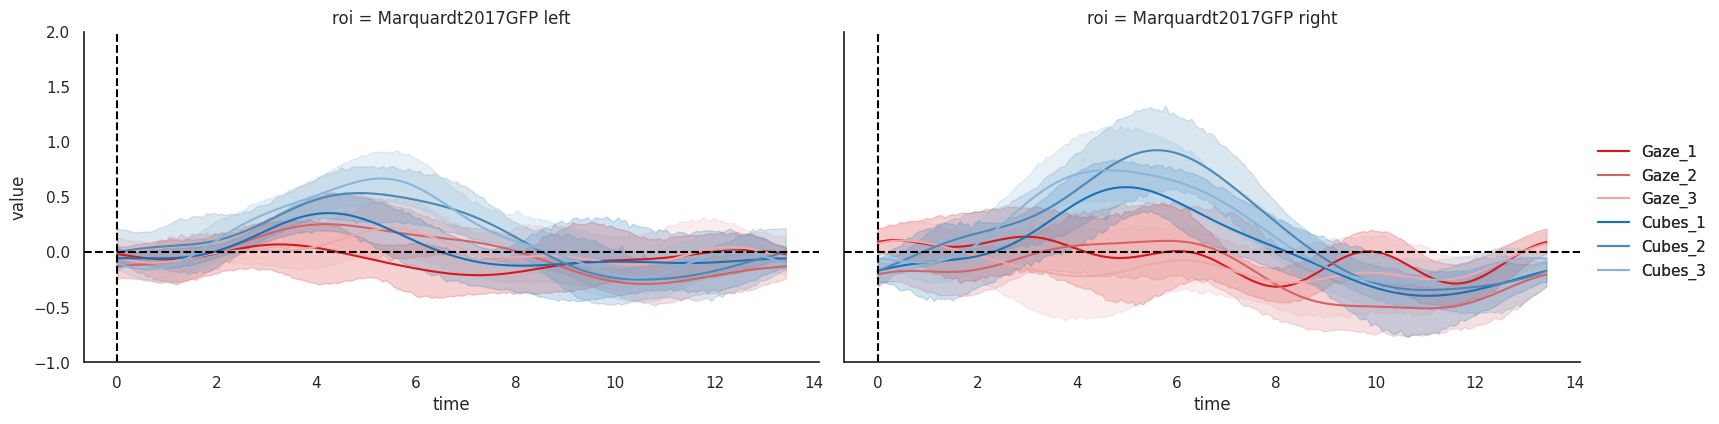

'fMotionArea'

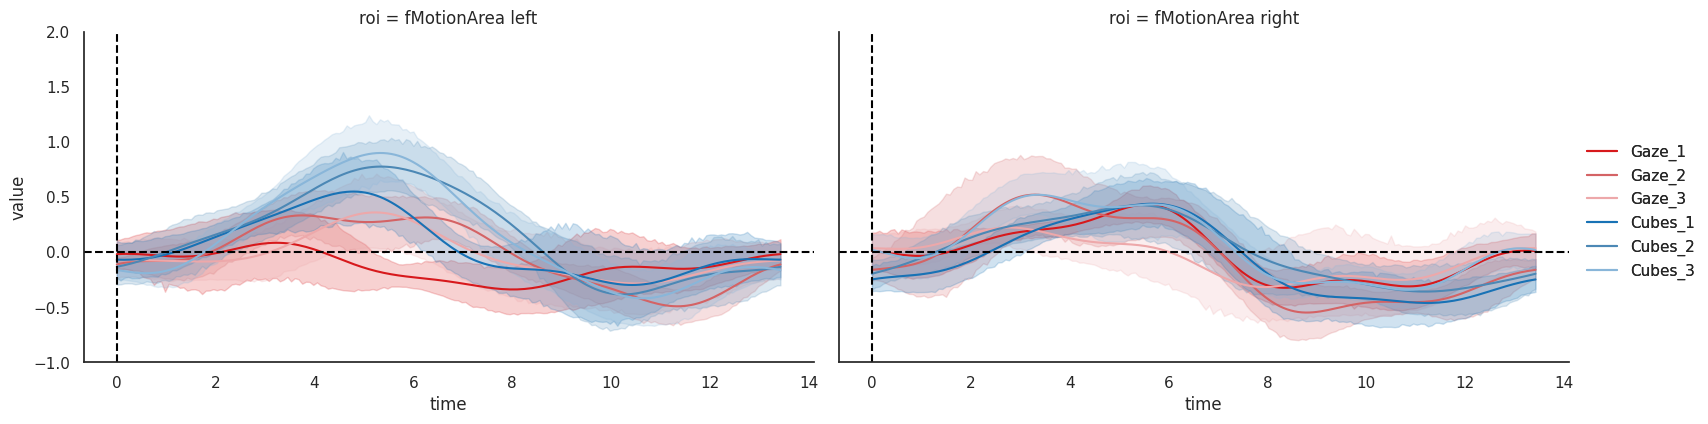

In [6]:
sub_id = 'sub-0000'
ses_id = 'ses-com'
task_id = 'gic'
look_at = ['Gaze_1', 'Gaze_2', 'Gaze_3', 'Cubes_1', 'Cubes_2', 'Cubes_3']

for area_ in ['GFP', 'GFPalt', 'Marquardt2017GFP', 'fMotionArea']:#subjects[sub_id][ses_id].hrf_estimation.model[task_id].keys():
    
    col_wrap = len(subjects[sub_id][ses_id].hrf_estimation.model[task_id][area_].get_timecourses().keys())
    
    if col_wrap > 0:
        plt.close('all')
        display(area_)
        fig = subjects[sub_id][ses_id].hrf_estimation.model[task_id][area_].plot_subject_timecourses(
            ci=95, 
            plots='subject', 
            col='roi', 
            col_wrap=col_wrap, 
            event_types=look_at, 
            palette=gma.info.colors, 
            height=5, 
            sharey=True)
        if col_wrap == 1:
            plt.title(area_)
        plt.ylim([-1, 2])
        plt.show()
        
        ### STORE IMAGE
#         f_name_extension = ses_id + '_' + task_id + '_' + 'individual-targets'

#         results_dir_ = opj(gma.info.data_paths.results_dir, 'from_nideconv', sub_id, f_name_extension)
#         if not isdir(results_dir_):
#             mkdir(results_dir_)
            
#         fig[0].fig.savefig(opj(results_dir_, area_+'.pdf'))

'GFP'

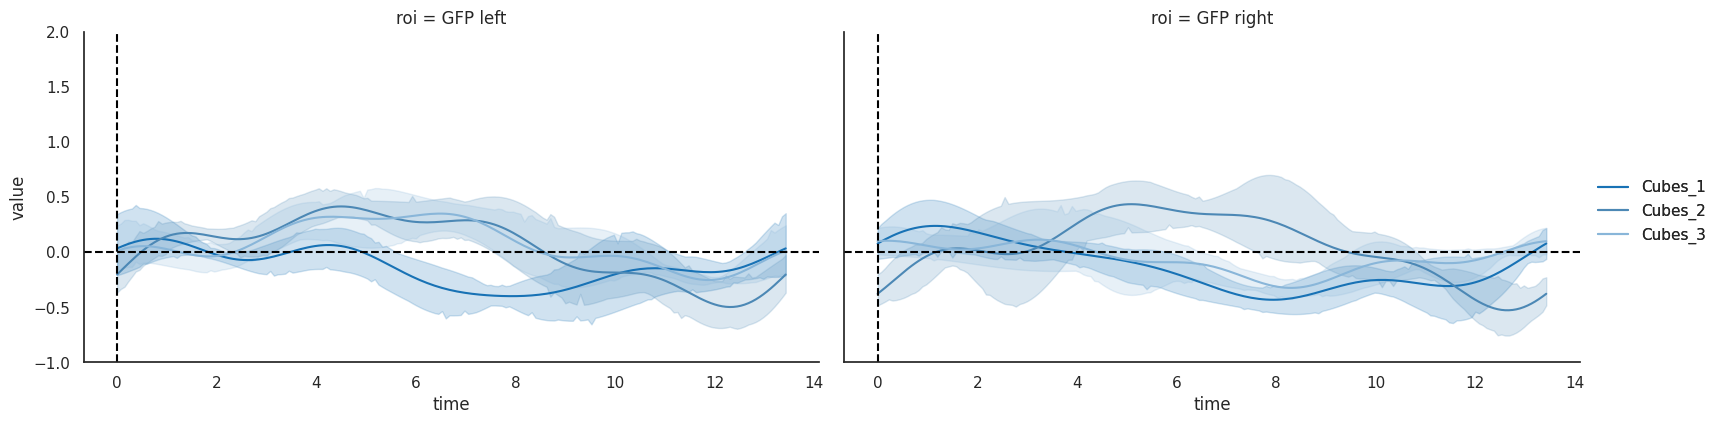

'GFPalt'

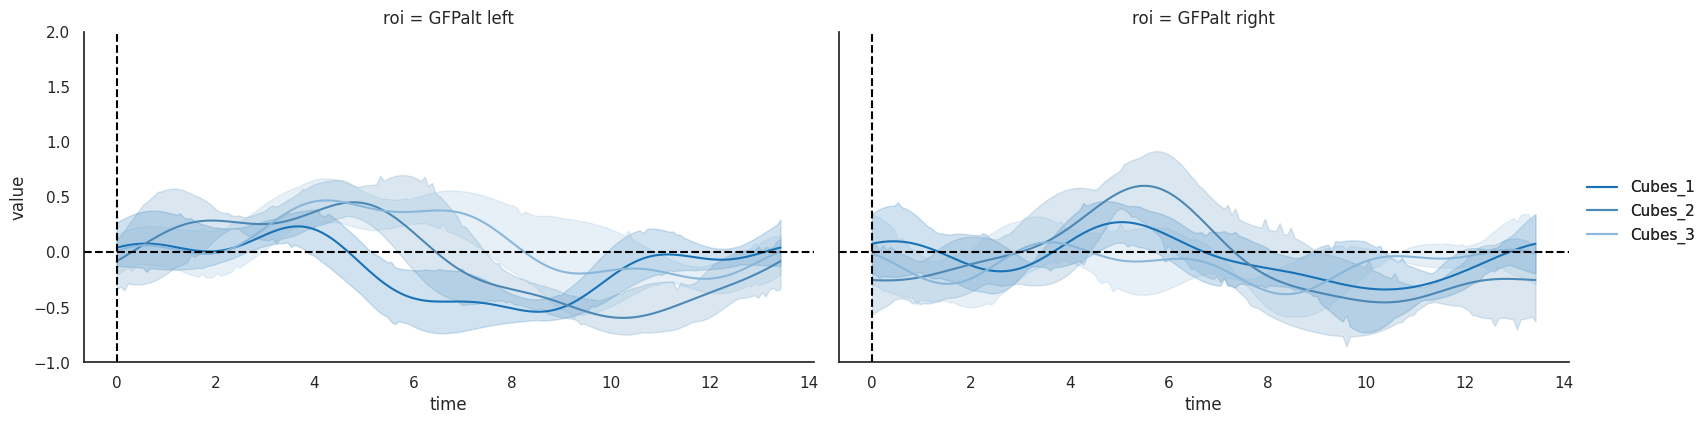

'Marquardt2017GFP'

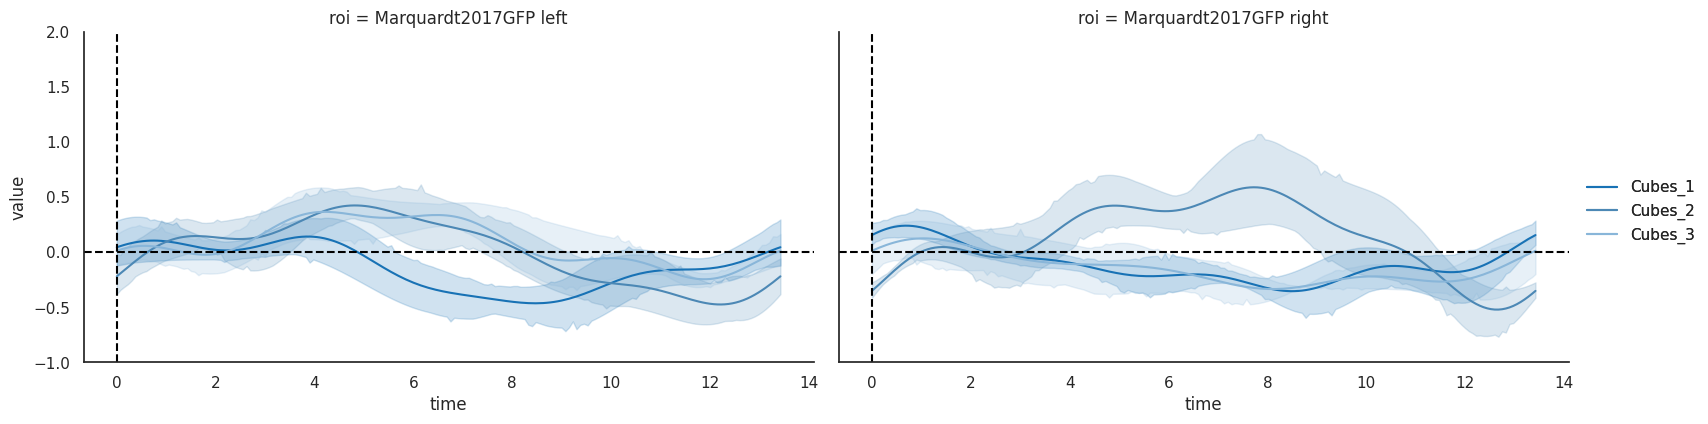

'fMotionArea'

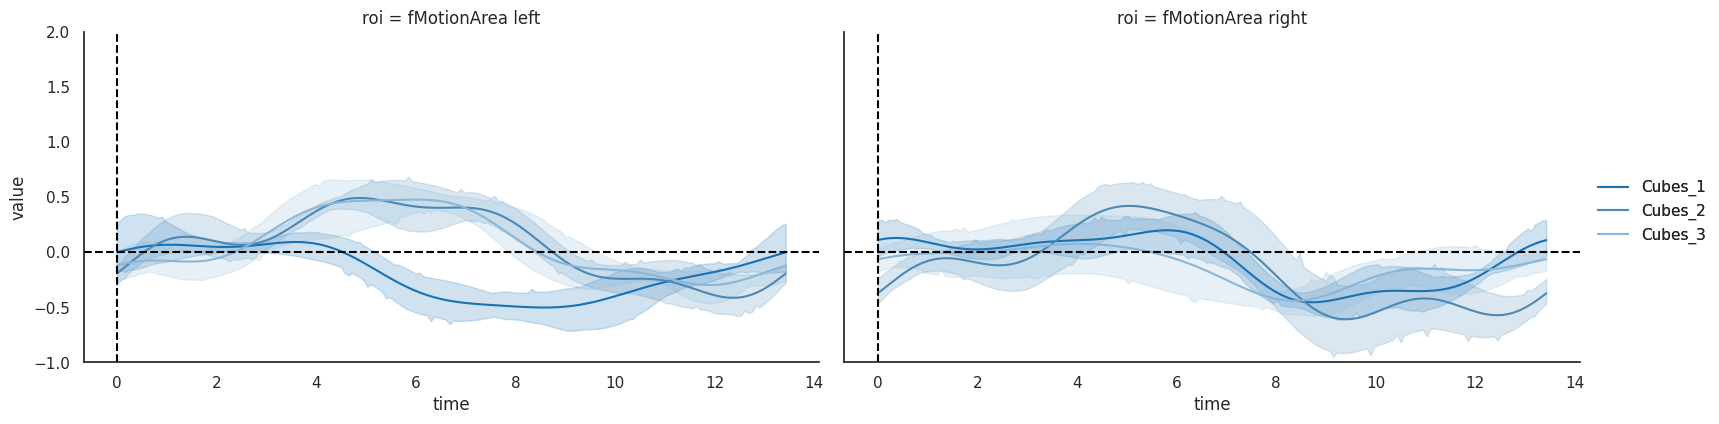

In [13]:
sub_id = 'sub-0000'
ses_id = 'ses-sep'
task_id = 'co'
look_at = ['Cubes_1', 'Cubes_2', 'Cubes_3']

for area_ in ['GFP', 'GFPalt', 'Marquardt2017GFP', 'fMotionArea']:#subjects[sub_id][ses_id].hrf_estimation.model[task_id].keys():
    
    col_wrap = len(subjects[sub_id][ses_id].hrf_estimation.model[task_id][area_].get_timecourses().keys())
    
    if col_wrap > 0:
        plt.close('all')
        display(area_)
        fig = subjects[sub_id][ses_id].hrf_estimation.model[task_id][area_].plot_subject_timecourses(
            ci=95, 
            plots='subject', 
            col='roi', 
            col_wrap=col_wrap, 
            event_types=look_at, 
            palette=gma.info.colors, 
            height=5, 
            sharey=True)
        if col_wrap == 1:
            plt.title(area_)
        plt.ylim([-1, 2])
        plt.show()
        
        ### STORE IMAGE
#         f_name_extension = ses_id + '_' + task_id + '_' + 'individual-targets'

#         results_dir_ = opj(gma.info.data_paths.results_dir, 'from_nideconv', sub_id, f_name_extension)
#         if not isdir(results_dir_):
#             mkdir(results_dir_)
            
#         fig[0].fig.savefig(opj(results_dir_, area_+'.pdf'))

'GFP'

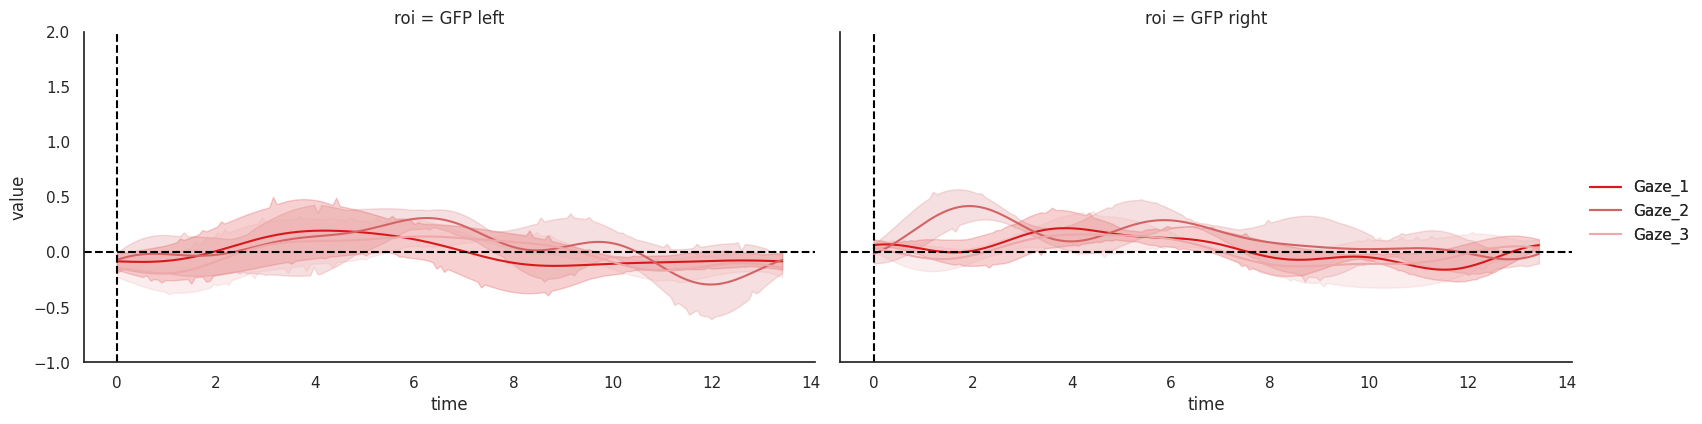

'GFPalt'

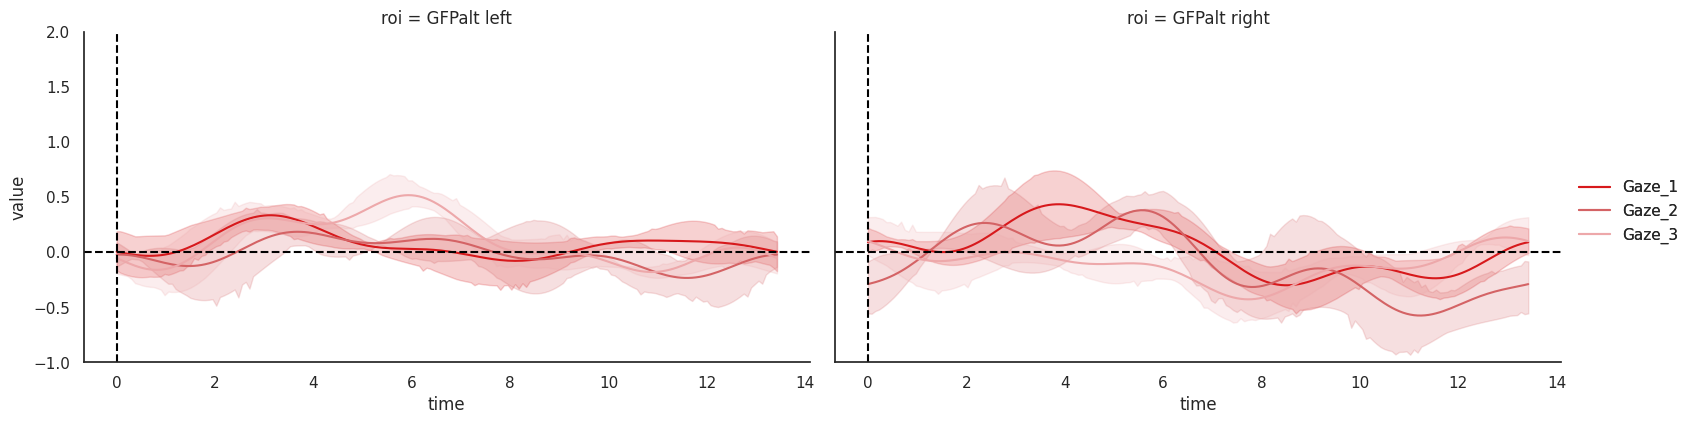

'Marquardt2017GFP'

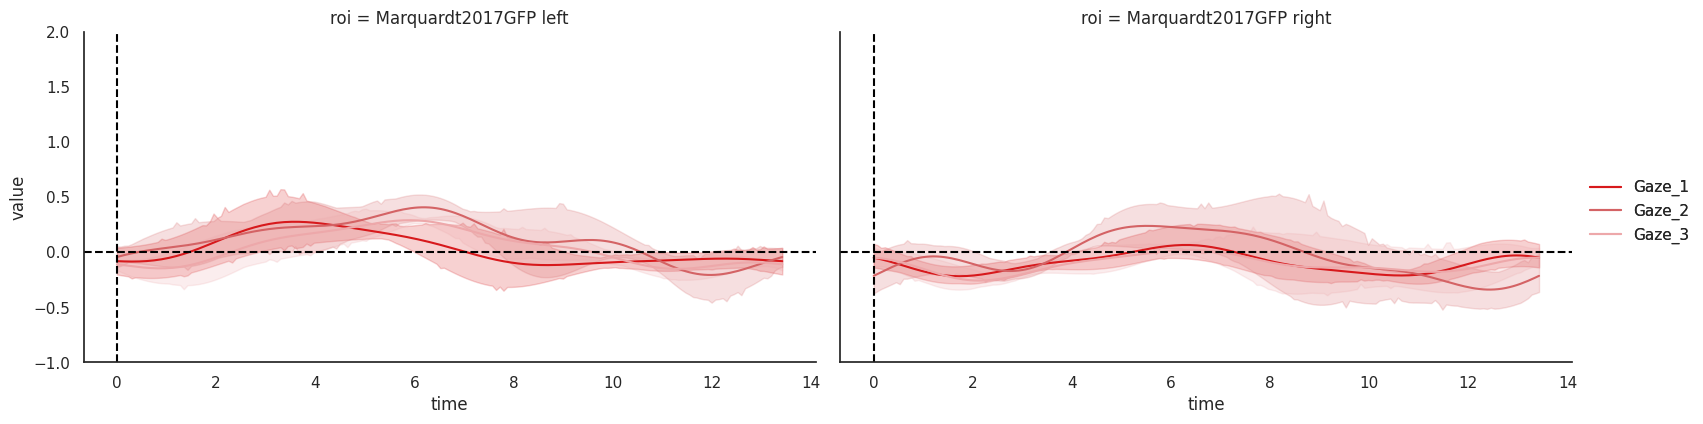

'fMotionArea'

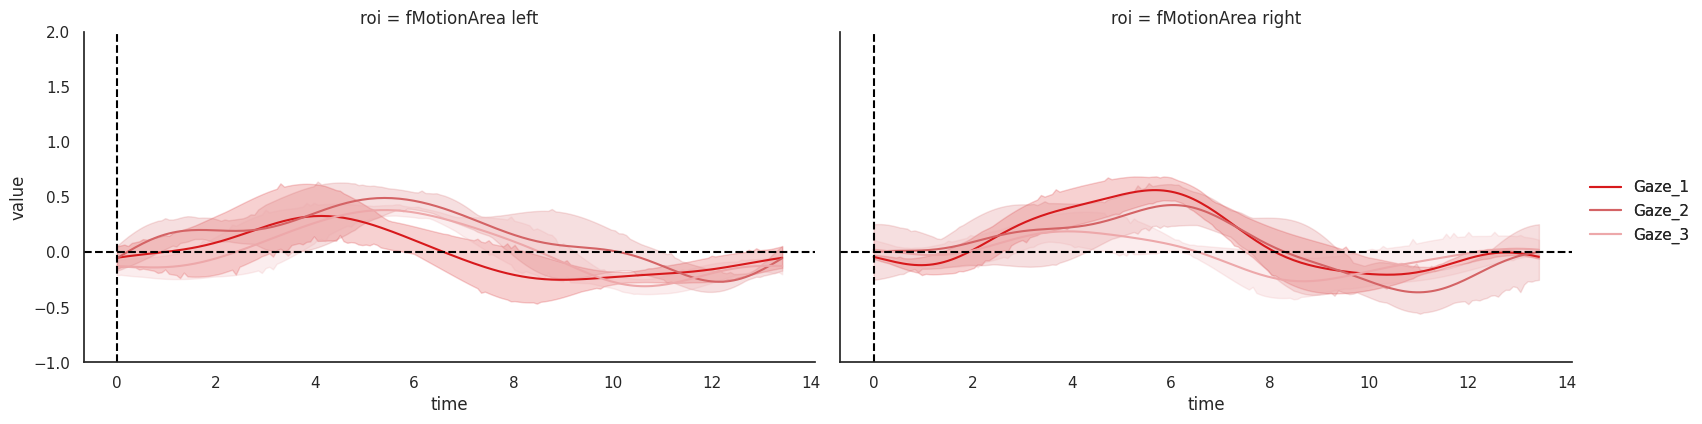

In [8]:
sub_id = 'sub-0000'
ses_id = 'ses-sep'
task_id = 'go'
look_at = ['Gaze_1', 'Gaze_2', 'Gaze_3']

for area_ in ['GFP', 'GFPalt', 'Marquardt2017GFP', 'fMotionArea']:#subjects[sub_id][ses_id].hrf_estimation.model[task_id].keys():
    
    col_wrap = len(subjects[sub_id][ses_id].hrf_estimation.model[task_id][area_].get_timecourses().keys())
    
    if col_wrap > 0:
        plt.close('all')
        display(area_)
        fig = subjects[sub_id][ses_id].hrf_estimation.model[task_id][area_].plot_subject_timecourses(
            ci=95, 
            plots='subject', 
            col='roi', 
            col_wrap=col_wrap, 
            event_types=look_at, 
            palette=gma.info.colors, 
            height=5, 
            sharey=True)
        if col_wrap == 1:
            plt.title(area_)
        plt.ylim([-1, 2])
        plt.show()
        
        ### STORE IMAGE
#         f_name_extension = ses_id + '_' + task_id + '_' + 'individual-targets'

#         results_dir_ = opj(gma.info.data_paths.results_dir, 'from_nideconv', sub_id, f_name_extension)
#         if not isdir(results_dir_):
#             mkdir(results_dir_)
            
#         fig[0].fig.savefig(opj(results_dir_, area_+'.pdf'))